In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

ticker = "SPY"
data = yf.download(ticker)

[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [17]:
wait_days = 40
# Calculate daily returns
data["return"] = data["Close"].diff()

# Identify down days
data["down"] = data["return"] < 0

# Identify 3-day losing streaks
data["3_day_losing_streak"] = (
    data["down"] & data["down"].shift(1) & data["down"].shift(2)
)

# Track days since the last streak
data["days_since_last_streak"] = np.nan
last_streak_day = -np.inf 

for i in range(len(data)):
    if data["3_day_losing_streak"].iloc[i]:
        if i - last_streak_day >= wait_days:  # Check if it's been at least wait_days trading days
            data.loc[data.index[i], "days_since_last_streak"] = i - last_streak_day
        last_streak_day = i

data

,Open,High,Low,Close,Adj Close,Volume,return,down,3_day_losing_streak,days_since_last_streak
Date,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.684116,1003200,NaN,False,False,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.859667,480500,0.312500,False,False,NaN
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.912346,201300,0.093750,False,False,NaN
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.175671,529400,0.468750,False,False,NaN
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.281017,531500,0.187500,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-07-24,548.859985,549.169983,540.289978,541.229980,541.229980,74515300,-12.550049,True,False,NaN
2024-07-25,541.349976,547.460022,537.450012,538.409973,538.409973,61158300,-2.820007,True,True,NaN
2024-07-26,542.280029,547.190002,541.489990,544.440002,544.440002,53763800,6.030029,False,False,NaN


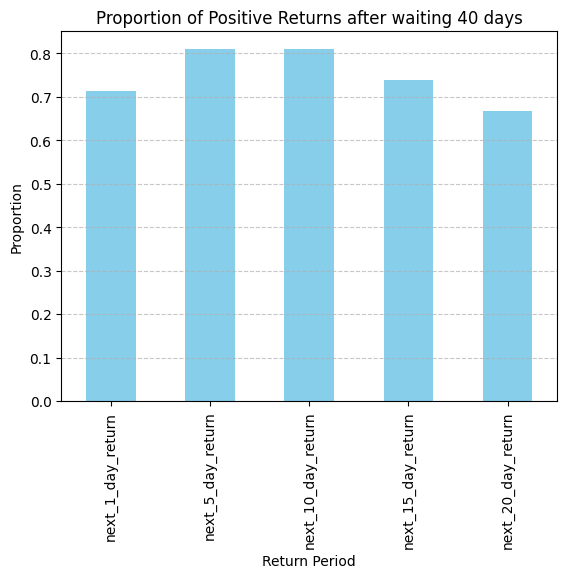

In [18]:
# Filter for occurrences meeting the criteria
result = data.dropna(subset=["days_since_last_streak"]).copy()

# Calculate future returns
result["next_1_day_return"] = data["Close"].shift(-1) / data["Close"] - 1
result["next_5_day_return"] = data["Close"].shift(-5) / data["Close"] - 1
result["next_10_day_return"] = data["Close"].shift(-10) / data["Close"] - 1
result["next_15_day_return"] = data["Close"].shift(-15) / data["Close"] - 1
result["next_20_day_return"] = data["Close"].shift(-20) / data["Close"] - 1

# Print results
cols = [
    "next_1_day_return",
    "next_5_day_return",
    "next_10_day_return",
    "next_15_day_return",
    "next_20_day_return"
]
import matplotlib.pyplot as plt
mean_values = result[cols].mean()
positive_return_ratios = result[cols].gt(0).mean()
# Plot the bar chart
fig, ax = plt.subplots()
positive_return_ratios.plot.bar(ax=ax, color='skyblue')

# Add title and labels
ax.set_title(f'Proportion of Positive Returns after waiting {wait_days} days')
ax.set_xlabel('Return Period')
ax.set_ylabel('Proportion')

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

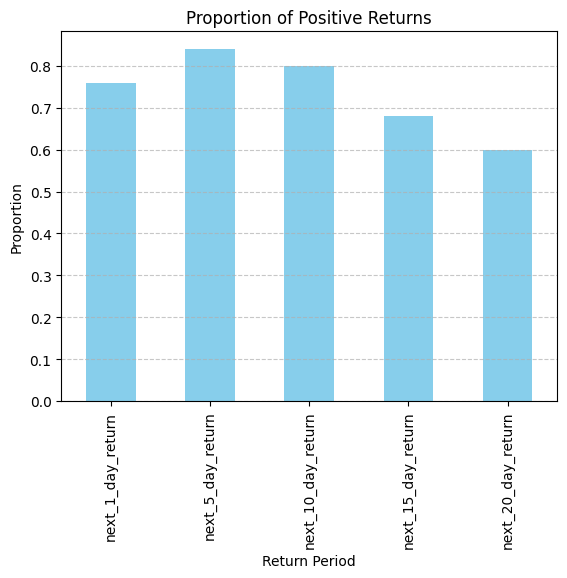

In [12]:
result

,Open,High,Low,Close,Adj Close,Volume,return,down,3_day_losing_streak,days_since_last_streak,next_1_day_return,next_5_day_return,next_10_day_return,next_21_day_return
Date,,,,,,,,,,,,,,
1993-02-17,43.468750,43.531250,43.281250,43.437500,24.403208,210900,-0.031250,True,True,inf,-0.000719,0.018705,0.038849,0.043165
1993-09-20,45.875000,45.968750,45.437500,45.437500,25.990068,57800,-0.375000,True,True,44.0,-0.003439,0.018569,0.017194,0.025447
1994-08-19,46.468750,46.515625,46.312500,46.421875,27.066891,103200,-0.031250,True,True,42.0,-0.001010,0.027264,0.018849,-0.005385
1996-12-12,74.781250,74.875000,72.937500,73.125000,44.894039,2540200,-1.234375,True,True,44.0,0.002564,0.026282,0.037607,0.052564
1997-08-25,92.781250,93.406250,91.843750,92.218750,57.334896,3888000,-0.343750,True,True,57.0,-0.014741,0.011860,0.014910,0.023043
1998-03-27,110.750000,110.781250,109.000000,109.625000,68.876427,2611300,-0.468750,True,True,43.0,-0.000570,0.027081,0.011403,-0.009692
1998-08-04,112.218750,112.218750,107.000000,107.000000,67.441032,15091600,-4.312500,True,True,49.0,0.013727,-0.001168,0.031542,-0.071554
2003-05-20,92.820000,93.029999,91.589996,92.459999,61.909096,55404600,-0.190002,True,True,70.0,0.002055,0.034718,0.072464,0.081765
2004-02-20,115.480003,115.559998,114.320000,114.879997,77.861443,46728800,-0.350006,True,True,63.0,-0.002524,0.001219,0.013057,-0.045526


In [17]:
data["Close"].shift(-10) / data["Close"] - 1

Date
1993-01-29    0.014936
1993-02-01   -0.017655
1993-02-02   -0.020437
1993-02-03   -0.031381
1993-02-04   -0.031944
                ...   
2024-07-23         NaN
2024-07-24         NaN
2024-07-25         NaN
2024-07-26         NaN
2024-07-29         NaN
Name: Close, Length: 7930, dtype: float64

In [16]:
result["next_1_day_return"]

Date
1993-02-17   -0.000719
1993-09-20   -0.003439
1994-08-19   -0.001010
1996-12-12    0.002564
1997-08-25   -0.014741
1998-03-27   -0.000570
1998-08-04    0.013727
2003-05-20    0.002055
2004-02-20   -0.002524
2004-10-14    0.005604
2005-08-08    0.006033
2007-06-07    0.013011
2007-09-24   -0.001978
2009-05-13    0.008570
2010-03-26    0.006348
2013-03-19    0.006985
2013-05-24    0.005989
2014-04-07    0.004123
2014-06-24    0.004520
2014-09-04    0.004495
2015-06-08   -0.000144
2016-03-24    0.000591
2016-08-26    0.004924
2017-12-05    0.000190
2019-02-28    0.006244
2019-05-08   -0.003026
2019-11-21    0.002224
2020-02-24   -0.030302
2020-06-11    0.011976
2020-09-08    0.019747
2021-05-12    0.012013
2021-12-20    0.017759
2024-03-15    0.005943
2024-06-24    0.003851
Name: next_1_day_return, dtype: float64